<img src="2.jpg"></img>

# Problem Statement
The basic idea is analyzing the Buisness Problem of Zomato to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

Dataset is available on Kaggle. You can download it from <a href="https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants"> here</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

print("Libraries imported")

Libraries imported


In [2]:
data=pd.read_csv('zomato.csv')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Remove Unnnecessary Columns

In [5]:
data.drop(['url','dish_liked','phone','menu_item','address'],axis=1,inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


### Check Duplicate values
Pandas `duplicated()` method helps in analyzing duplicate values only. It returns a boolean series which is True only for Unique elements.

In [6]:
data.duplicated().sum()

72

In [7]:
data.drop_duplicates(inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [8]:
data.shape

(51645, 12)

Earlier there were 51717 rows, and we found 72 duplicate values which is removed and now there are only 51645 rows.

### Check Missing Values

In [9]:
data.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7757
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

As resturant data cannot be filled with either mean or mode, thus we will remove all null values.

In [10]:
data.dropna(how='any',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43480 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43480 non-null  object
 1   online_order                 43480 non-null  object
 2   book_table                   43480 non-null  object
 3   rate                         43480 non-null  object
 4   votes                        43480 non-null  int64 
 5   location                     43480 non-null  object
 6   rest_type                    43480 non-null  object
 7   cuisines                     43480 non-null  object
 8   approx_cost(for two people)  43480 non-null  object
 9   reviews_list                 43480 non-null  object
 10  listed_in(type)              43480 non-null  object
 11  listed_in(city)              43480 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.3+ MB


After dropping null values, our dataset contains 43480 rows.

### Fix Column names and values

In [11]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

We need to fix some column names such as `approx_cost(for two people)`, `listed_in(type)` and `listed_in(type)`

In [12]:
data = data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'type', 'city'],
      dtype='object')

In [13]:
#Check data type of cost
print(data['cost'].dtypes)

object


In [14]:
#Change the cost(object type) to string type
data['cost'] = data['cost'].astype(str)

#Use lambda function to replace ',' from cost with blank
data['cost'] = data['cost'].apply(lambda x: x.replace(',','')) 

#Change the cost to Float
data['cost'] = data['cost'].astype(float) 

#Check dataset after transformation
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43480 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43480 non-null  object 
 1   online_order  43480 non-null  object 
 2   book_table    43480 non-null  object 
 3   rate          43480 non-null  object 
 4   votes         43480 non-null  int64  
 5   location      43480 non-null  object 
 6   rest_type     43480 non-null  object 
 7   cuisines      43480 non-null  object 
 8   cost          43480 non-null  float64
 9   reviews_list  43480 non-null  object 
 10  type          43480 non-null  object 
 11  city          43480 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.3+ MB
None


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [15]:
#Read uninque values from the Rate column
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

We can see there are two string values i.e., `NEW` and `-`, these needs to be removed and also rating is from 5 which is obvious thus, replacing values with just rating.

In [16]:
#Remove values like 'NEW' and '-' from rate column
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [17]:
#Remove '/5' with just rating number and convert it into float.
data['rate']=data['rate'].apply(lambda x: x.replace('/5',''))
data['rate']=data['rate'].astype('float')

#Check dataset after transformation
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41221 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41221 non-null  object 
 1   online_order  41221 non-null  object 
 2   book_table    41221 non-null  object 
 3   rate          41221 non-null  float64
 4   votes         41221 non-null  int64  
 5   location      41221 non-null  object 
 6   rest_type     41221 non-null  object 
 7   cuisines      41221 non-null  object 
 8   cost          41221 non-null  float64
 9   reviews_list  41221 non-null  object 
 10  type          41221 non-null  object 
 11  city          41221 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.1+ MB
None


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [18]:
data.cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800., 1900.,  180.,  330.,
       2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

### Exploratory Data Analysis

#### Online Restaurant Delivery 

Text(0.5, 1.0, 'Number of Restaurants Delivering online')

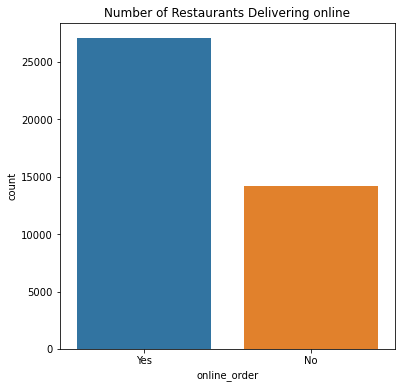

In [19]:
sns.countplot(data['online_order'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Number of Restaurants Delivering online')

There are more number of resturaunts delivering `online` than those which are not.

Text(0.5, 1.0, 'Type of Restaurants Delivering online')

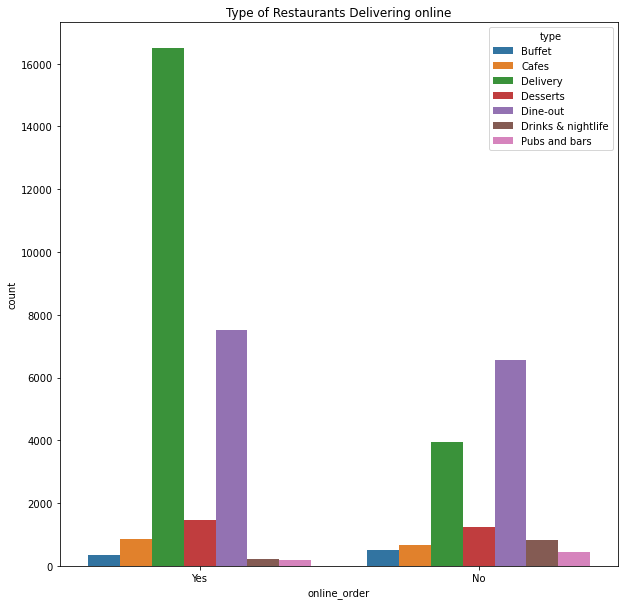

In [20]:
sns.countplot(x=data['online_order'], hue = data['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type of Restaurants Delivering online')

#### Table Booking

Text(0.5, 1.0, 'Number of Restaurants allowing table booking')

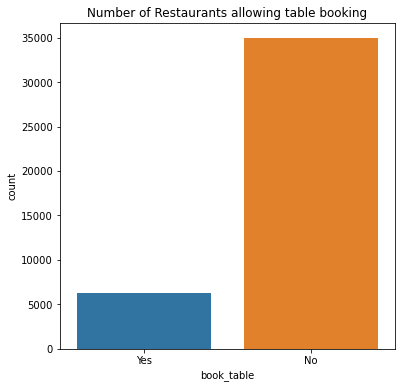

In [21]:
sns.countplot(data['book_table'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Number of Restaurants allowing table booking')

There are more number of restaurants which don't allows `table booking` than those which allows.

Text(0.5, 1.0, 'Type of Restaurants allows booking table')

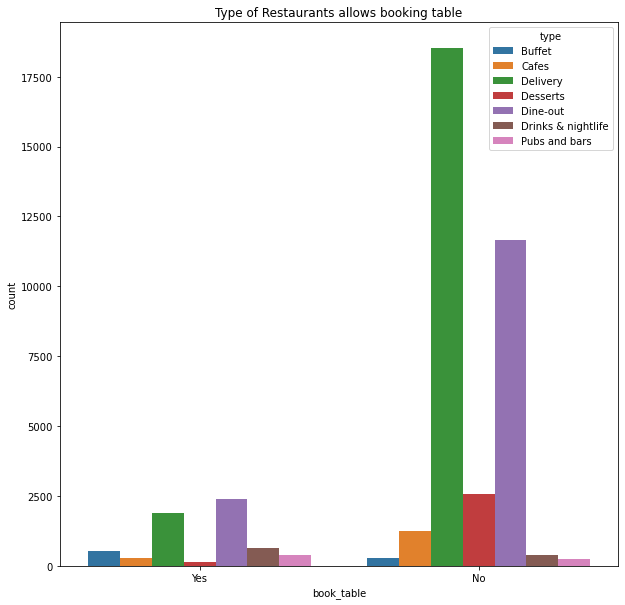

In [22]:
sns.countplot(x=data['book_table'], hue = data['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type of Restaurants allows booking table')

#### Restaurant ratings

Text(0.5, 1.0, 'Number of restaurants with their ratings')

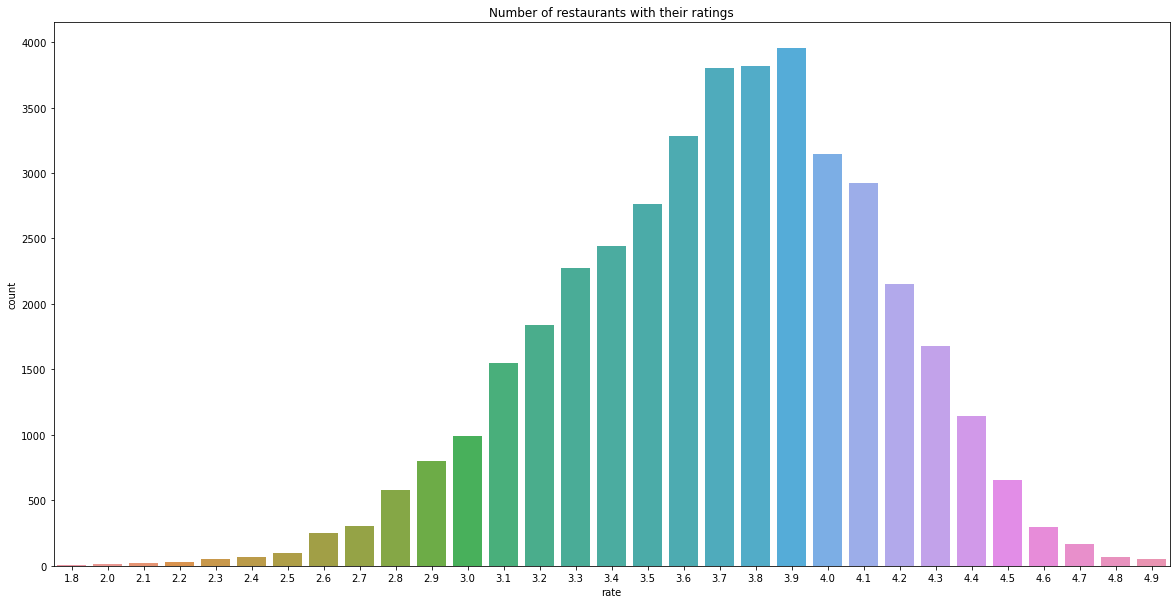

In [23]:
sns.countplot(x='rate',data=data)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Number of restaurants with their ratings')

This shows most number of restaurants have `rating` of <b>3.9,3.8 and 3.7</b>

Now let group `ratings` and create a `pie chart` visualizing their percentages.

In [24]:
group1=((data.rate>=1.5) & (data.rate<2)).sum()
group2=((data.rate>=2) & (data.rate<2.5)).sum()
group3=((data.rate>=2.5) & (data.rate<3)).sum()
group4=((data.rate>=3.0) & (data.rate<3.5)).sum()
group5=((data.rate>=3.5) & (data.rate<4)).sum()
group6=((data.rate>=4) & (data.rate<4.5)).sum()
group7=((data.rate>=4.5) & (data.rate<5)).sum()

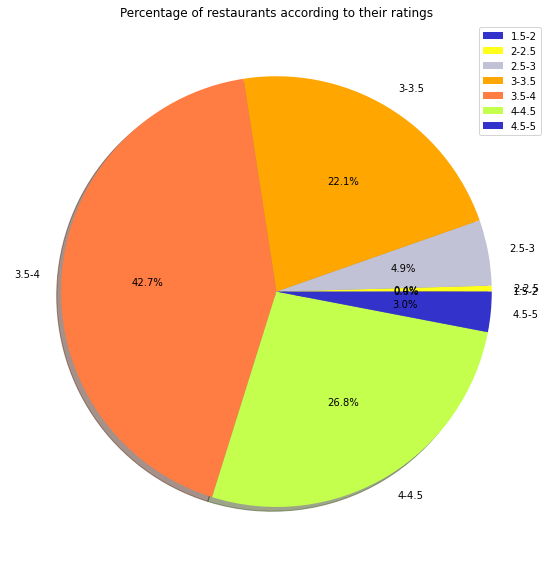

In [25]:
plt.figure(figsize=(10,8))
plt.pie([group1,group2,group3,group4,group5,group6,group7], labels=['1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5'],
              colors=['#3333cc','#ffff1a','#c2c2d6','#ffa600','#ff7c43','#c4ff4d'],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(['1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5'])
plt.title('Percentage of restaurants according to their ratings')
plt.tight_layout()
plt.show()

#### Restaurants Costing

In [26]:
group1=((data.cost>=100)&(data.cost<1000)).sum()
group2=((data.cost>=1000)&(data.cost<2000)).sum()
group3=((data.cost>=2000)&(data.cost<3000)).sum()
group4=((data.cost>=3000)&(data.cost<4000)).sum()
group5=(data.cost>=4000).sum()

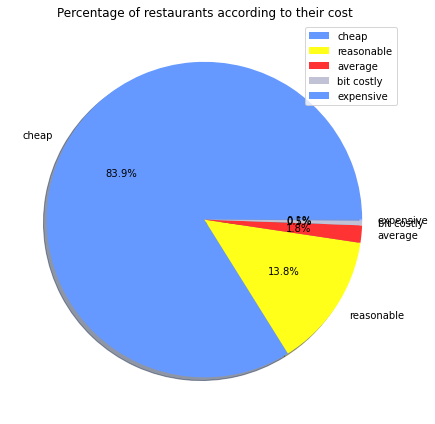

In [27]:
plt.figure(figsize=(8,6))
plt.pie([group1,group2,group3,group4,group5], labels=['cheap','reasonable','average','bit costly','expensive'],
              colors=['#6699ff','#ffff1a','#ff3333','#c2c2d6','#6699ff'],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(['cheap','reasonable','average','bit costly','expensive'])
plt.title('Percentage of restaurants according to their cost')
plt.tight_layout()
plt.show()

Above pie chart shows, `cost` of maximum number of restaurants is between 100-1000 i.e., <b>cheap</b> in banglore area.

#### Restaurants in different Locations

In [28]:
data['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

Text(0.5, 1.0, 'Restaurants in different locations')

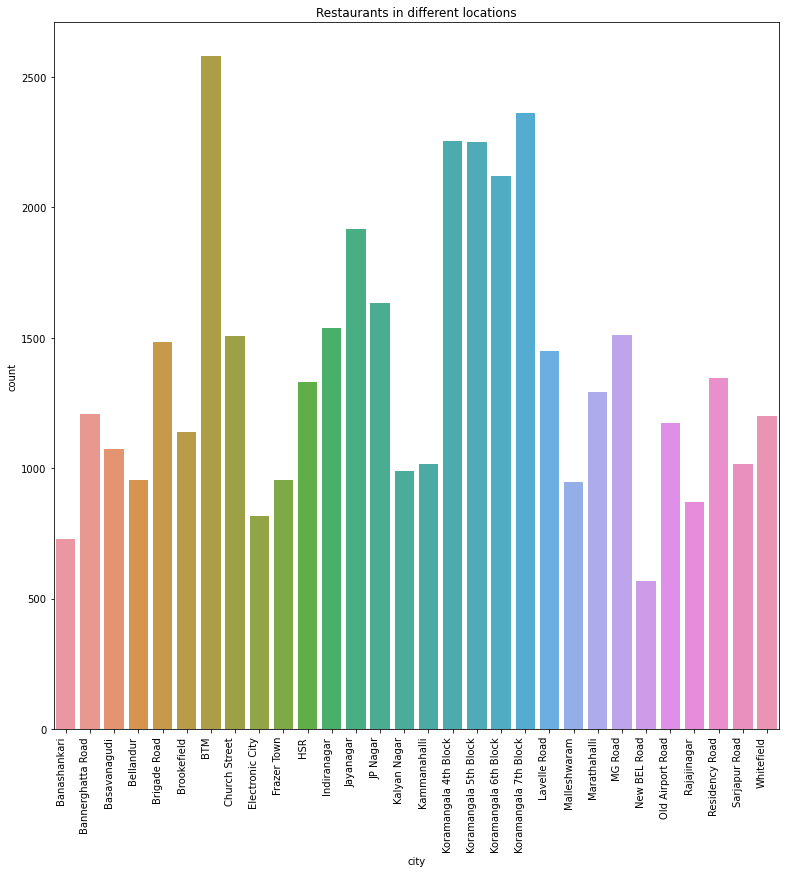

In [29]:
sns.countplot(data['city'])
sns.countplot(data['city']).set_xticklabels(sns.countplot(data['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Restaurants in different locations')

`Location` named <b>BTM</b> has most number of restaurants followed by <b> Koramangala</b>

#### Service type

Text(0.5, 1.0, 'Type of Service')

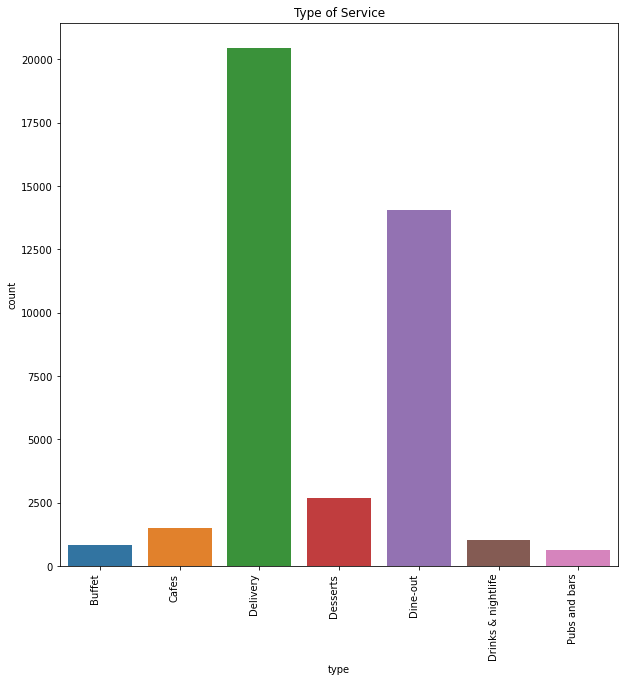

In [30]:
sns.countplot(data['type'])
sns.countplot(data['type']).set_xticklabels(sns.countplot(data['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type of Service')

Most number of `Service type` in Bangalore is <b>Delivery</b>

#### Service Type and Rating

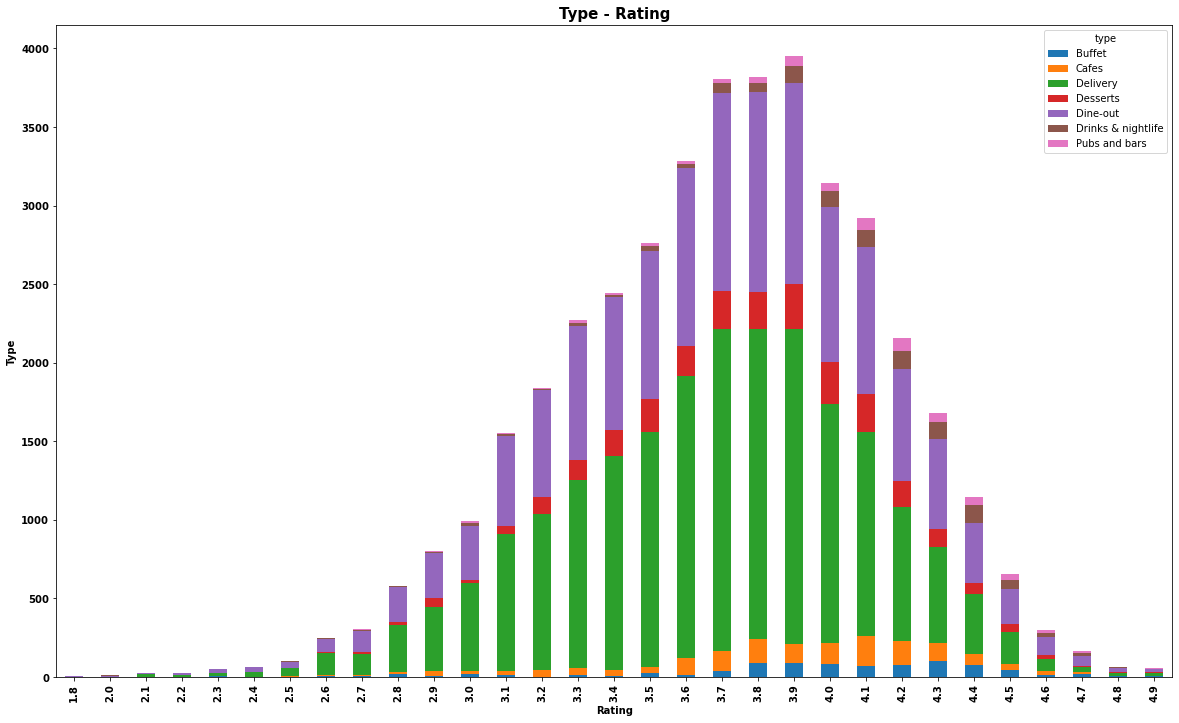

In [31]:
type_plt=pd.crosstab(data['rate'],data['type'])
type_plt.plot(kind='bar',stacked=True,figsize=(20,12));
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

#### Distribution of Restaurants by it's type: `rest_type`

In [32]:
trace1 = go.Bar(
                x = data['rest_type'].value_counts().head(20).keys(),
                y = data['rest_type'].value_counts().head(20),
                name = "rest_type",
                text = data['rest_type'])
data1 = [trace1]
layout = go.Layout(title = 'Restaurant Distribution by Sub-Categories', 
                   barmode = "group", 
                   yaxis=dict(title= 'Number of Restaurants'))
fig = go.Figure(data = data1, layout = layout)
py.offline.iplot(fig, filename = 'basic-line')

In the above graph, we can see that there are almost 14,000 restaurants serving quick bites in the city. At the second position, we have casual dining options (9,500 restaurants) followed by Cafe.

#### Most Popular cuisines in city 

(-0.5, 999.5, 999.5, -0.5)

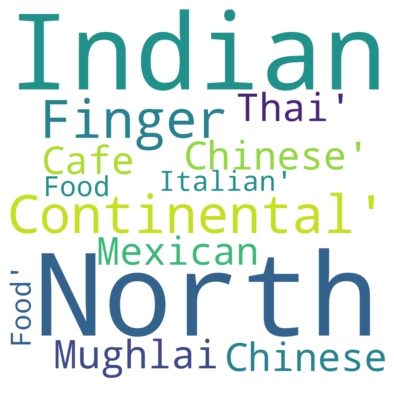

In [33]:
c1 = ''.join(str(data['cuisines'].values))
from wordcloud import WordCloud
plt.figure(figsize=(10,7))
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1000, height=1000).generate(c1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

<b>North Indian, Continental, Chinese and Mughali</b> are the most popular cuisines amongst other in Bengaluru city.

#### Famous restaurants in Bengaluru

Text(0.5, 0, 'Number of outlets')

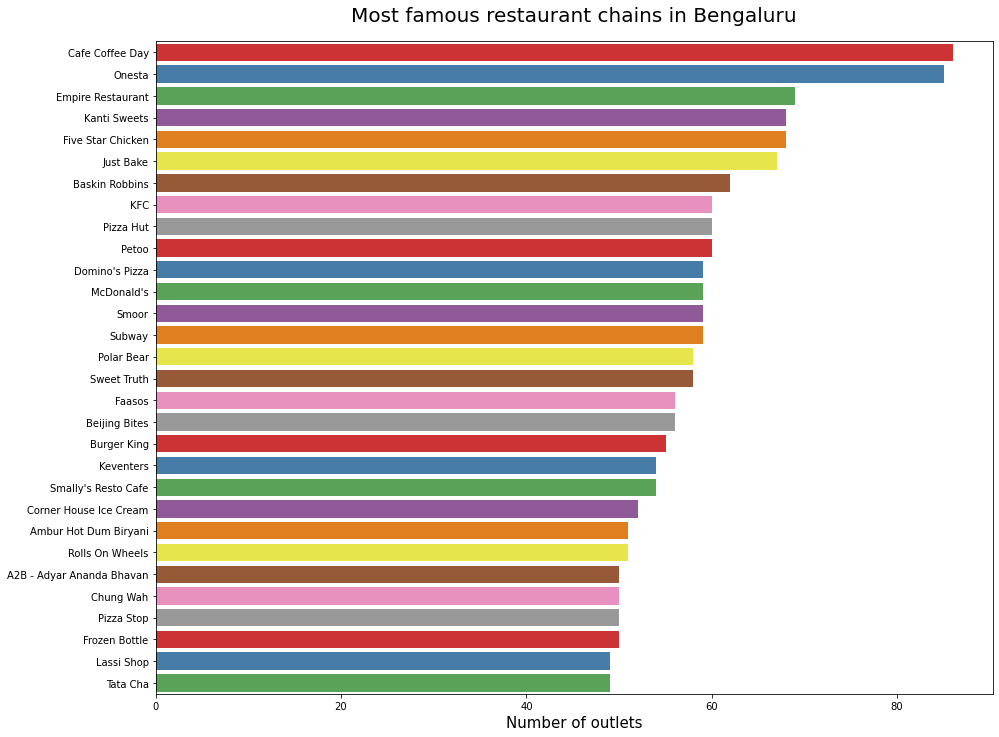

In [34]:
plt.figure(figsize=(15,12))
chains=data['name'].value_counts()[:30]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bengaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

From above graph, <b> Cafe Coffee Day and Onesta </b>are most famous restaurants as they have most number of outlets in city.